In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

--2020-01-30 07:48:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   158MB/s    in 0.9s    

2020-01-30 07:48:54 (158 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

zip_path = '/tmp/horse-or-human.zip'
zipper = zipfile.ZipFile(zip_path, 'r')
zipper.extractall('/tmp/horse-or-human')
zipper.close()

In [3]:
data_dir = '/tmp/horse-or-human/'
train_horse_dir = os.path.join(data_dir, 'horses')
train_human_dir = os.path.join(data_dir, 'humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

['horse42-8.png', 'horse42-3.png', 'horse31-9.png', 'horse40-0.png', 'horse28-2.png', 'horse36-4.png', 'horse04-0.png', 'horse02-9.png', 'horse01-5.png', 'horse27-3.png']
['human14-16.png', 'human04-17.png', 'human06-17.png', 'human10-19.png', 'human08-16.png', 'human01-30.png', 'human17-03.png', 'human13-14.png', 'human02-11.png', 'human05-14.png']


In [4]:
print('Total horse images:', len(train_horse_names))
print('Total human images:', len(train_human_names))

Total horse images: 500
Total human images: 527


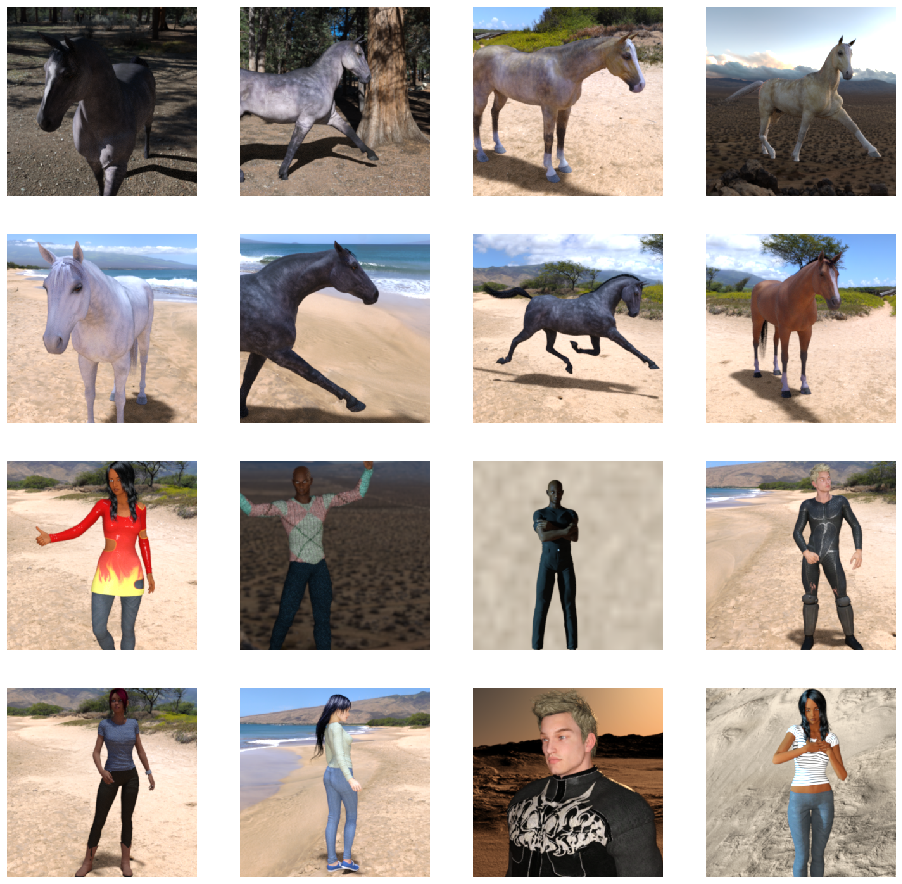

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[0:8]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[0:8]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)

plt.show()


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                                   
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['acc']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.99:
      print('Stopping training as our target accuracy reached!')
      self.model.stop_training=True

callback = myCallback()

history = model.fit_generator(
      train_gen,
      steps_per_epoch=8,  
      epochs=15,
      verbose=2,
      callbacks=[callback])

Epoch 1/15
8/8 - 84s - loss: 0.7361 - acc: 0.4894
Epoch 2/15
8/8 - 85s - loss: 1.2844 - acc: 0.6440
Epoch 3/15
8/8 - 95s - loss: 0.4755 - acc: 0.7881
Epoch 4/15
8/8 - 74s - loss: 0.4723 - acc: 0.8488
Epoch 5/15
8/8 - 96s - loss: 0.1823 - acc: 0.9248
Epoch 6/15
8/8 - 85s - loss: 0.5981 - acc: 0.8343
Epoch 7/15
8/8 - 86s - loss: 0.3129 - acc: 0.8810
Epoch 8/15


In [0]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [0]:
plt.plot(range(len(history.history['acc'])), history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
#model.save('/content/model_mlds.h5')

In [0]:
from tensorflow.keras.models import load_model

model = load_model('/content/model_mlds.h5')

In [0]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  image_path = '/content/' + fn
  img = image.load_img(image_path, target_size=(300, 300))
  x = image.img_to_array(img)
  plt.imshow(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)


x /= 255

successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  # number of features in feature map
    
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')